In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [29]:
data = pd.read_csv('https://raw.githubusercontent.com/DavidGlezGmz/NeiveBayes/main/exNB.csv', header=None)

In [30]:
data

,0,1,2
0,75.626754,181.704486,1.0
1,70.540408,176.177640,1.0
2,76.875023,178.667364,1.0
3,70.225610,157.504877,1.0
4,74.106298,168.525499,1.0
...,...,...,...
995,68.394140,141.464087,0.0
996,65.280727,138.177757,0.0
997,65.345827,135.199530,0.0
998,59.385331,152.598596,0.0


In [31]:
x = data.to_numpy()
print (x)

[[ 75.62675441 181.70448626   1.        ]
 [ 70.54040833 176.17763989   1.        ]
 [ 76.87502316 178.66736388   1.        ]
 ...
 [ 65.34582701 135.19952982   0.        ]
 [ 59.38533074 152.59859562   0.        ]
 [ 68.708487   129.95783574   0.        ]]


In [32]:
y = x[:, -1]
print (y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [33]:
x = x[:,:-1]

In [34]:
print (x)
print (x.shape)

[[ 75.62675441 181.70448626]
 [ 70.54040833 176.17763989]
 [ 76.87502316 178.66736388]
 ...
 [ 65.34582701 135.19952982]
 [ 59.38533074 152.59859562]
 [ 68.708487   129.95783574]]
(1000, 2)


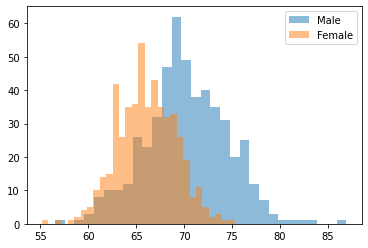

In [35]:
plt.figure()
plt.hist(x[y==1,0], label="Male", alpha=0.5, bins=30)
plt.hist(x[y==0,0], label="Female", alpha=0.5, bins=30)
plt.legend()

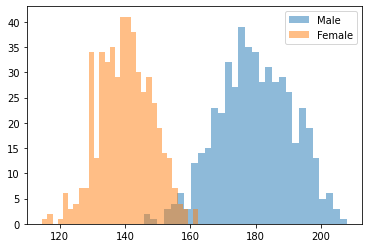

In [36]:
plt.figure()
plt.hist(x[y==1,1], label="Male", alpha=0.5, bins=30)
plt.hist(x[y==0,1], label="Female", alpha=0.5, bins=30)
plt.legend()

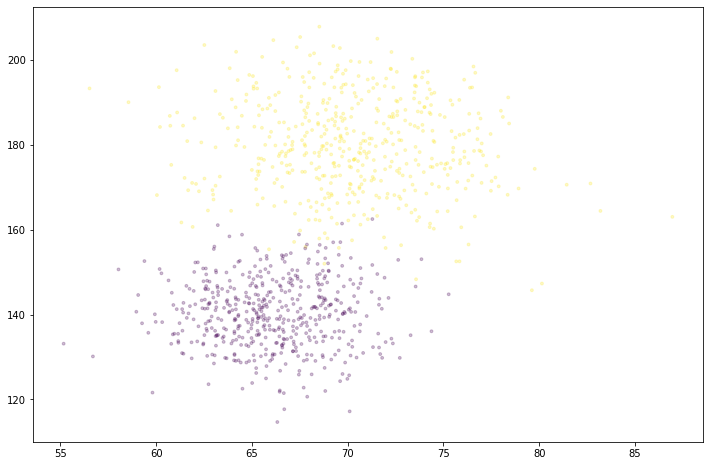

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(x[:,0],x[:,1], c=y, alpha=0.25, s=8)

In [38]:
class GaussNB():

  def fit(self, x, y, epsilon = 1e-3):
    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:

      x_k = x[y==k,:]

      self.likelihoods[k] = {"mean": x_k.mean(axis=0), "cov": x_k.var(axis=0) + epsilon}
      self.priors[k] = len(x_k)/len(x)

  def predict(self, x):

    N, D = x.shape
    P_hat = np.zeros ((N,len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:, k] = mvn.logpdf(x, l["mean"], l["cov"]) + np.log(self.priors[k])
    
    return P_hat.argmax(axis=1)

In [39]:
gnb = GaussNB()

In [40]:
gnb.fit(x,y)

In [41]:
y_hat=gnb.predict(x)

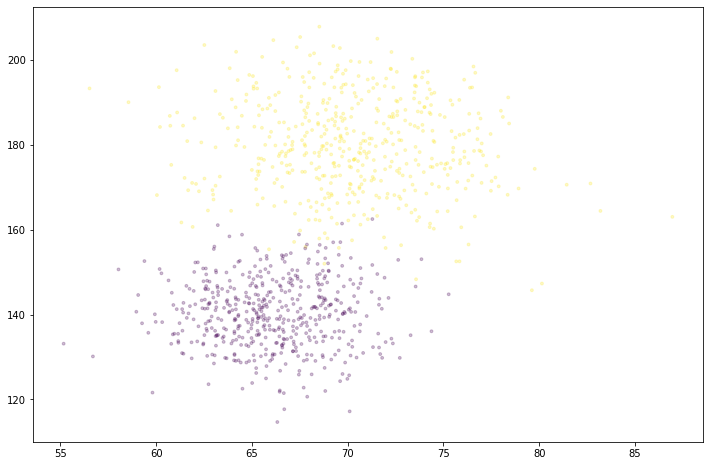

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(x[:,0],x[:,1], c=y, alpha=0.25, s=8)

In [43]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

accuracy(y,y_hat)

0.988

In [44]:
def CoinFlip(y):
  y_hat=np.zeros(len(y))
  for i in range (len(y)):
      flip = np.random.randn(1)
      if flip>0:
        y_hat[i] = 1
  return y_hat

In [45]:
y_not_hat = CoinFlip(y)

In [46]:
accuracy(y, y_not_hat)

0.479

In [47]:
class GaussBayes():
  
  def fit (self, x, y, epsilon = 1e-3):
    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:
      x_k = x[y==k,:]
      N_k, D = x_k.shape
      mu_k = x_k.mean(axis=0)

      self.priors[k]=len(x_k)/len(x)
      self.likelihoods[k]={"mean": x_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((x_k-mu_k).T,x_k-mu_k)+epsilon*np.identity(D)}
          
  
  def predict(self, x):
    N,D = x.shape
    P_hat = np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(x,l["mean"], l["cov"])+np.log(self.priors[k])

    return P_hat.argmax(axis=1)


In [48]:
data2 = pd.read_csv('https://raw.githubusercontent.com/DavidGlezGmz/NeiveBayes/main/xor.csv')

In [49]:
data2

,x1,x2,y
0,1.907567,0.325865,0
1,2.270544,2.258817,0
2,2.323086,1.466601,0
3,0.752419,2.684305,0
4,2.837229,2.238149,0
...,...,...,...
3995,2.274223,-2.579655,1
3996,1.541694,-1.140535,1
3997,3.059691,-2.873532,1
3998,3.525607,-2.331070,1


In [50]:
x2 = data2.to_numpy()
print (x2)

[[ 1.90756726  0.32586513  0.        ]
 [ 2.27054368  2.25881652  0.        ]
 [ 2.32308573  1.46660143  0.        ]
 ...
 [ 3.0596909  -2.87353245  1.        ]
 [ 3.52560718 -2.33106954  1.        ]
 [ 1.72005898 -1.13464011  1.        ]]


In [51]:
y2 = x2[:, -1]
print (y2)

[0. 0. 0. ... 1. 1. 1.]


In [52]:
x2 = x2[:,:-1]

In [53]:
x2

array([[ 1.90756726,  0.32586513],
       [ 2.27054368,  2.25881652],
       [ 2.32308573,  1.46660143],
       ...,
       [ 3.0596909 , -2.87353245],
       [ 3.52560718, -2.33106954],
       [ 1.72005898, -1.13464011]])

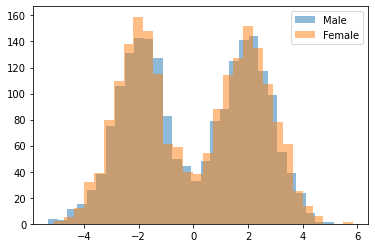

In [54]:
plt.figure()
plt.hist(x2[y2==1,0], label="Male", alpha=0.5, bins=30)
plt.hist(x2[y2==0,0], label="Female", alpha=0.5, bins=30)
plt.legend()

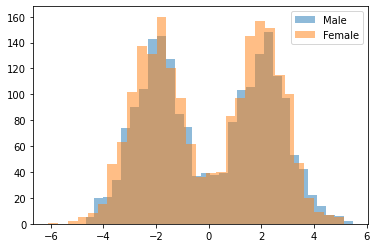

In [55]:
plt.figure()
plt.hist(x2[y2==1,1], label="Male", alpha=0.5, bins=30)
plt.hist(x2[y2==0,1], label="Female", alpha=0.5, bins=30)
plt.legend()

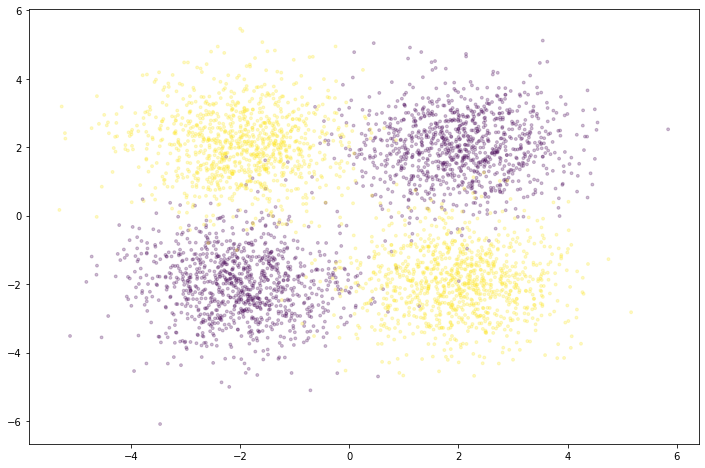

In [56]:
plt.figure(figsize=(12,8))
plt.scatter(x2[:,0],x2[:,1], c=y2, alpha=0.25, s=8)

In [57]:
gbayes = GaussBayes()

In [58]:
gbayes.fit(x2, y2)

In [59]:
y_hat_gb = gbayes.predict(x2)

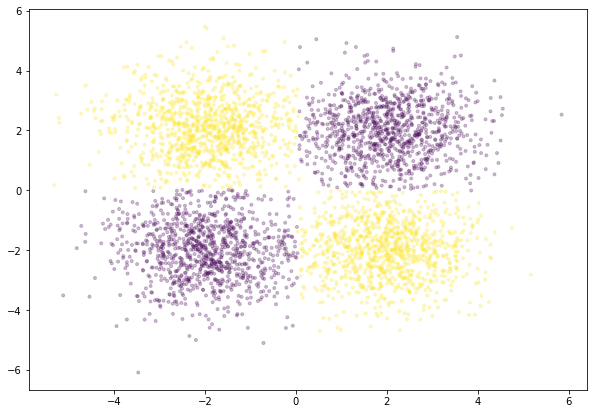

In [60]:
plt.figure(figsize=(10,7))
plt.scatter(x2[:,0],x2[:,1], c=y_hat_gb, alpha=0.25, s=9)

In [61]:
accuracy(y2,y_hat_gb)

0.95825